In [198]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

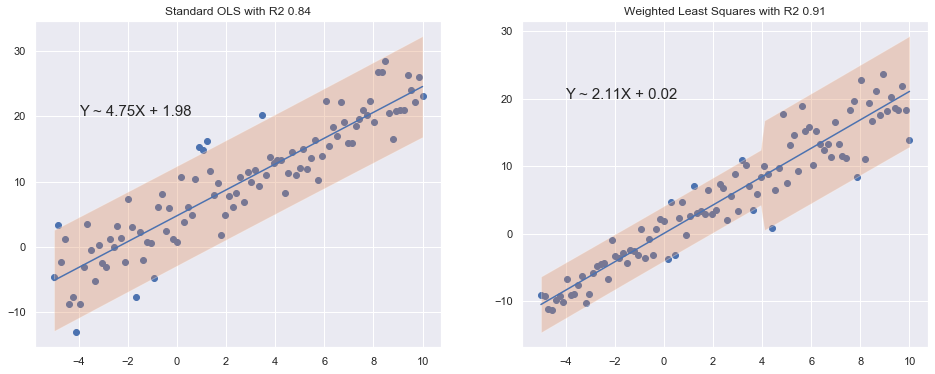

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

X = np.linspace(-5, 10, 100)
Y = 2 * X + 5 + stats.norm.rvs(scale=4, size=100)
X_with_b = sm.add_constant(X)
ols_model = sm.OLS(Y, X_with_b).fit()
_, ols_iv_l, ols_iv_u = wls_prediction_std(ols_model)

ax1.scatter(X, Y)
ax1.plot(X, ols_model.predict())
ax1.fill_between(X, ols_iv_l, ols_iv_u, alpha=0.3)
ols_text = f'Y ~ {ols_model.params[0].round(2)}X + {ols_model.params[1].round(2)}'
ax1.text(-4, 20, ols_text, fontsize=15)
ax1.set_title(f'Standard OLS with R2 {ols_model.rsquared.round(2)}');

w = np.full([100], 2)
w[60:] = 4
first_inv = 2 * X[:60]
sec_inv = 2 * X[60:]
Y_wls = np.hstack([first_inv, sec_inv])
Y_wls += stats.norm.rvs(size=100) * w
wls_model = sm.WLS(Y_wls, sm.add_constant(X), weights = 1/ (w ** 2)).fit()

ax2.scatter(X, Y_wls)
prdst, wls_iv_l, wls_iv_u = wls_prediction_std(wls_model)
ax2.fill_between(X, wls_iv_l, wls_iv_u, alpha=0.3)
ax2.plot(X, wls_model.predict())
wls_text = f'Y ~ {wls_model.params[1].round(2)}X + {wls_model.params[0].round(2)}'
ax2.text(-4, 20, wls_text, fontsize=15)
ax2.set_title(f'Weighted Least Squares with R2 {wls_model.rsquared.round(2)}');

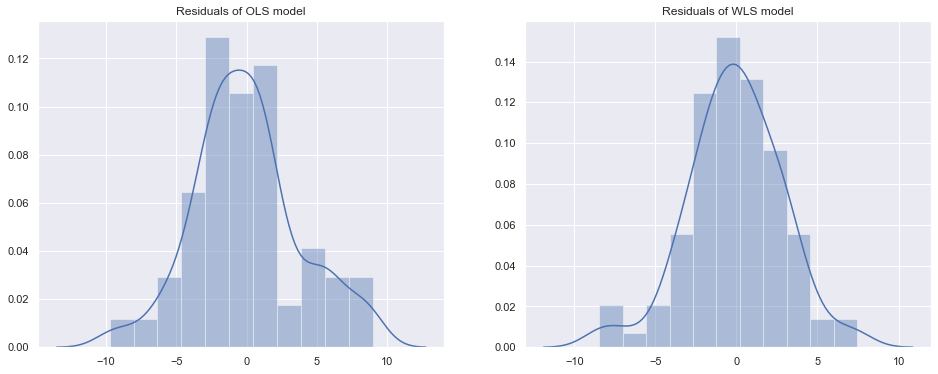

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(ols_model.resid, ax=ax1)
ax1.set_title('Residuals of OLS model')
sns.distplot(wls_model.resid, ax=ax2)
ax2.set_title('Residuals of WLS model');

### Copper analysis

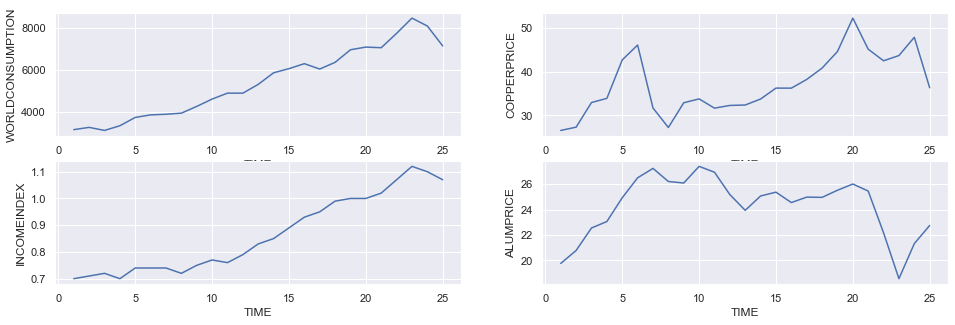

In [208]:
df = sm.datasets.copper.load_pandas().data
cols = ['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE']
_ , axes = plt.subplots(2, 2, figsize=(16,5))
for i, ax in enumerate(axes.flat):
    sns.lineplot(y=cols[i], x='TIME', data=df, ax=ax)

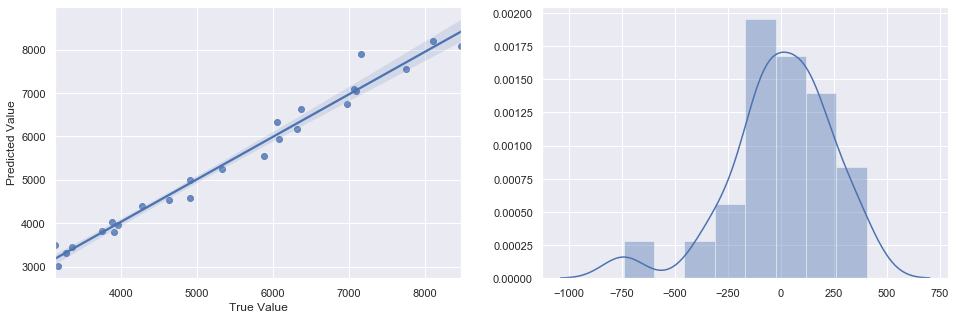

In [218]:
Y = df['WORLDCONSUMPTION']
X = df.drop(columns='WORLDCONSUMPTION')

model = sm.OLS(Y, sm.add_constant(X)).fit()
Y_pred = model.predict()
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.regplot(Y, Y_pred, ax=ax1)
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
sns.distplot(model.resid, ax=ax2);

In [230]:
jb_res = sms.jarque_bera(model.resid)
jb_res = np.round(jb_res, 3)
print(f'Jarque Bera test: {jb_res[0]} pvalue: {jb_res[1]} skew: {jb_res[2]} kurtosis {jb_res[3]}')

Jarque Bera test: 6.465 pvalue: 0.039 skew: -0.959 kurtosis 4.589
